# Collect Data
Reference: https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

In [1]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from clustergrammer2 import net

>> clustergrammer2 backend version 0.17.0


In [3]:
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

def get_team_id(team_name):
    for team in teams:
        if team['teamName'] == team_name:
            return team['teamId']
    return -1

In [4]:
def get_shot_data(first_name, last_name, team, season, gridsize=20, 
                  x_min=-300, x_max=300, y_min=0, y_max=350, shot_type='FGA'):
    
    shot_json = shotchartdetail.ShotChartDetail(
                team_id = get_team_id(team),
                player_id = get_player_id(first_name, last_name),
                context_measure_simple = shot_type,
                season_nullable = season,
                season_type_all_star = 'Regular Season')

    shot_data = json.loads(shot_json.get_json())
    
    full_name = first_name + '_' + last_name

    relevant_data = shot_data['resultSets'][0]
    headers = relevant_data['headers']

    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    df = pd.DataFrame(rows)
    
    if df.shape[0] > 0:
    
        df.columns = headers

        extent = (x_min, x_max, y_min, y_max)

        image = plt.hexbin(df.LOC_X, df.LOC_Y, cmap=color_map, gridsize=gridsize, mincnt=0, extent=extent) 

        counts = image.get_array()
        ncnts = np.count_nonzero(counts)
        verts = image.get_offsets()
        df_grid = pd.DataFrame(verts, columns=['x', 'y'])
        df_grid['counts'] = pd.Series(counts)        
        df_grid.index = df_grid.apply(lambda x: str(x['x']) + '_' + str(x['y']), axis=1).values.tolist()
        ser_grid = df_grid['counts']
        ser_grid.name = full_name

        
    else:
        df = pd.DataFrame()
        ser_grid = pd.Series(0, name=full_name)
        
    
    return df, ser_grid

In [5]:
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

In [6]:
color_map = plt.cm.Spectral_r

In [39]:
# df, df_grid = get_shot_data('James', 'Harden', 'Houston Rockets', '2018-19', gridsize=25)
# print(df.shape, df_grid.shape)

In [40]:
# df, df_grid = get_shot_data('Giannis', 'Antetokounmpo', 'Milwaukee Bucks', '2018-19', gridsize=25)
# print(df.shape, df_grid.shape)

In [41]:
# df, df_grid = get_shot_data('Stephen', 'Curry', 'Golden State Warriors', '2018-19', gridsize=25)
# print(df.shape, df_grid.shape)

In [10]:
teams_dict = {}
for inst_team in teams:
    teams_dict[inst_team['teamId']] = inst_team

In [14]:
import time

Steven Adams Oklahoma City Thunder (809, 24)
Bam Adebayo Miami Heat (486, 24)
LaMarcus Aldridge San Antonio Spurs (1319, 24)
Nickeil Alexander-Walker New Orleans Pelicans (0, 0)
Grayson Allen Memphis Grizzlies (0, 0)
Jarrett Allen Brooklyn Nets (568, 24)
Kadeem Allen New York Knicks (141, 24)
Al-Farouq Aminu Orlando Magic (0, 0)
Kyle Anderson Memphis Grizzlies (276, 24)
Giannis Antetokounmpo Milwaukee Bucks (1247, 24)
Kostas Antetokounmpo Los Angeles Lakers (0, 0)
Thanasis Antetokounmpo Milwaukee Bucks (0, 0)
Carmelo Anthony Portland Trail Blazers (0, 0)
OG Anunoby Toronto Raptors (404, 24)
Ryan Arcidiacono Chicago Bulls (418, 24)
Trevor Ariza Sacramento Kings (0, 0)
D.J. Augustin Orlando Magic (677, 24)
Deandre Ayton Phoenix Suns (870, 24)
Dwayne Bacon Charlotte Hornets (257, 24)
Marvin Bagley III Sacramento Kings (706, 24)
Lonzo Ball New Orleans Pelicans (0, 0)
Mo Bamba Orlando Magic (243, 24)
J.J. Barea Dallas Mavericks (385, 24)
Harrison Barnes Sacramento Kings (310, 24)
RJ Barrett

Willy Hernangomez Charlotte Hornets (295, 24)
Tyler Herro Miami Heat (0, 0)
Mario Hezonja Portland Trail Blazers (0, 0)
Buddy Hield Sacramento Kings (1360, 24)
Nene  Houston Rockets (116, 24)
George Hill Milwaukee Bucks (269, 24)
Solomon Hill Memphis Grizzlies (0, 0)
Jaylen Hoard Portland Trail Blazers (0, 0)
Aaron Holiday Indiana Pacers (262, 24)
Jrue Holiday New Orleans Pelicans (1159, 24)
Justin Holiday Indiana Pacers (0, 0)
Rondae Hollis-Jefferson Toronto Raptors (0, 0)
Richaun Holmes Sacramento Kings (0, 0)
Rodney Hood Portland Trail Blazers (217, 24)
Al Horford Philadelphia 76ers (0, 0)
Talen Horton-Tucker Los Angeles Lakers (0, 0)
Danuel House Jr. Houston Rockets (252, 24)
Dwight Howard Los Angeles Lakers (0, 0)
Kevin Huerter Atlanta Hawks (657, 24)
De'Andre Hunter Atlanta Hawks (0, 0)
Chandler Hutchison Chicago Bulls (209, 24)
Serge Ibaka Toronto Raptors (877, 24)
Andre Iguodala Memphis Grizzlies (0, 0)
Ersan Ilyasova Milwaukee Bucks (381, 24)
Joe Ingles Utah Jazz (802, 24)
Bra

Luka Samanic San Antonio Spurs (0, 0)
JaKarr Sampson Indiana Pacers (0, 0)
Dario Saric Phoenix Suns (0, 0)
Tomas Satoransky Chicago Bulls (0, 0)
Admiral Schofield Washington Wizards (0, 0)
Dennis Schroder Oklahoma City Thunder (1104, 24)
Mike Scott Philadelphia 76ers (190, 24)
Thabo Sefolosha Houston Rockets (0, 0)
Collin Sexton Cleveland Cavaliers (1206, 24)
Landry Shamet Los Angeles Clippers (210, 24)
Marial Shayok Philadelphia 76ers (0, 0)
Iman Shumpert Brooklyn Nets (0, 0)
Pascal Siakam Toronto Raptors (945, 24)
Chris Silva Miami Heat (0, 0)
Ben Simmons Philadelphia 76ers (960, 24)
Kobi Simmons Charlotte Hornets (0, 0)
Anfernee Simons Portland Trail Blazers (63, 24)
Alen Smailagic Golden State Warriors (0, 0)
Marcus Smart Boston Celtics (567, 24)
Ish Smith Washington Wizards (0, 0)
Zhaire Smith Philadelphia 76ers (34, 24)
Dennis Smith Jr. New York Knicks (293, 24)
Tony Snell Detroit Pistons (0, 0)
Omari Spellman Golden State Warriors (0, 0)
Max Strus Chicago Bulls (0, 0)
Edmond Sum

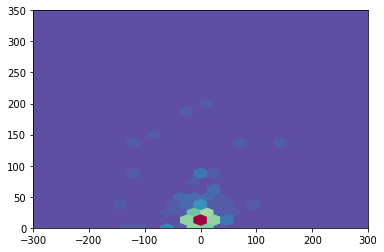

In [15]:
df_shots_all = None
list_grid = []
for inst_player in players:
    
    team_id = inst_player['teamId']
    if team_id > 0:
        team_name = teams_dict[team_id]['teamName']

        first_name = inst_player['firstName']
        last_name = inst_player['lastName'] 

        df_shots, ser_grid = get_shot_data(first_name, last_name, team_name, '2018-19', gridsize=25)    
        print(first_name, last_name, team_name, df_shots.shape)    

        if ser_grid.shape[0] > 1:
            list_grid.append(ser_grid)

            if df_shots_all is None:
                df_shots_all = df_shots
            else:
                df_shots_all = pd.concat([df_shots_all, df_shots], axis=0)
                
    time.sleep(5)




In [16]:
df_grid_all = pd.concat(list_grid, axis=1)

In [17]:
df_grid_all.shape

(740, 247)

In [18]:
df_grid_all

,Steven_Adams,Bam_Adebayo,LaMarcus_Aldridge,Jarrett_Allen,Kadeem_Allen,Kyle_Anderson,Giannis_Antetokounmpo,OG_Anunoby,Ryan_Arcidiacono,D.J._Augustin,...,Kenrich_Williams,Lou_Williams,Marvin_Williams,Robert_Williams III,D.J._Wilson,Justise_Winslow,Trae_Young,Cody_Zeller,Ante_Zizic,Ivica_Zubac
-300.0000006_0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-300.0000006_25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-300.0000006_50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-300.0000006_75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-300.0000006_100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288.00000057599993_237.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288.00000057599993_262.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288.00000057599993_287.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288.00000057599993_312.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


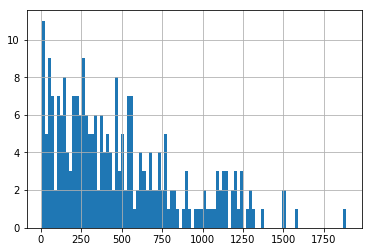

In [19]:
df_grid_all.sum(axis=0).hist(bins=100)

In [20]:
df_grid_all.sum(axis=0).max()

1889.0

In [21]:
# for inst_team in teams[:1]:
#     print(inst_team['teamName'])
#     for inst_pla

In [22]:
df.shape

(1340, 24)

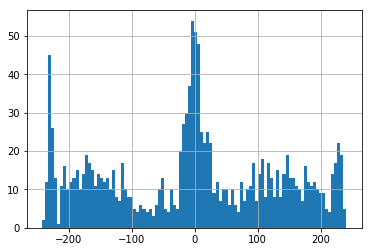

In [23]:
df.LOC_X.hist(bins=100)

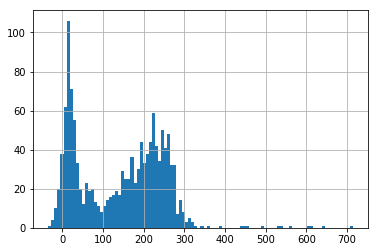

In [24]:
df.LOC_Y.hist(bins=100)

In [28]:
df_grid_all.to_csv('../data/fga_df_grid_all.csv')
df_shots_all.to_csv('../data/fga_shots.csv')

# df_grid_all = pd.read_csv('../data/fga_grid_all.csv', index_col=0)
# df_shots_all = pd.read_csv('../data/fga_shots.csv', index_col=0)

In [85]:
ser_sum = df_grid_all.sum(axis=0)
ser_sum.name = 'num shots'
ser_cat = pd.Series('Undefined', index=ser_sum.index.tolist(), name='Category')
# meta_player = pd.DataFrame([ser_sum.values], index=ser_sum.index.tolist())
meta_player = pd.concat([ser_cat, ser_sum], axis=1)
meta_player

,Category,num shots
Steven_Adams,Undefined,690.0
Bam_Adebayo,Undefined,429.0
LaMarcus_Aldridge,Undefined,1209.0
Jarrett_Allen,Undefined,511.0
Kadeem_Allen,Undefined,136.0
...,...,...
Justise_Winslow,Undefined,725.0
Trae_Young,Undefined,1249.0
Cody_Zeller,Undefined,312.0
Ante_Zizic,Undefined,287.0


In [29]:
df_grid_all.shape

(740, 247)

In [30]:
df_shots_all.shape

(126151, 24)

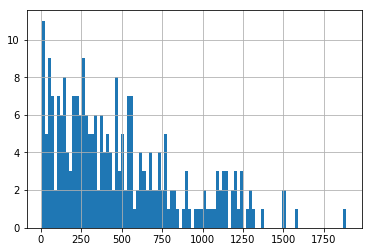

In [31]:
ser_sum = df_grid_all.sum(axis=0)
ser_sum.hist(bins=100)

In [32]:
min_made_shots = 50
keep_players = ser_sum[ser_sum > min_made_shots].index.tolist()
len(keep_players)

227

In [33]:
df_grid_filt = df_grid_all[keep_players]
df_grid_filt.shape

(740, 227)

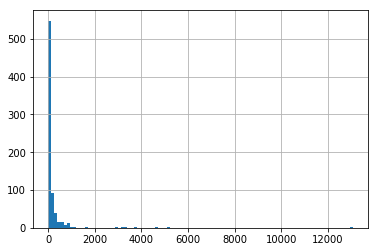

In [34]:
ser_sum = df_grid_filt.sum(axis=1)
ser_sum.hist(bins=100)

In [35]:
min_shots_in_region = 25
keep_grid = ser_sum[ser_sum > min_shots_in_region].index.tolist()
len(keep_grid)

409

In [36]:
df_grid_final = df_grid_filt.loc[keep_grid]
df_grid_final.shape

(409, 227)

In [37]:
df_grid_final

,Steven_Adams,Bam_Adebayo,LaMarcus_Aldridge,Jarrett_Allen,Kadeem_Allen,Kyle_Anderson,Giannis_Antetokounmpo,OG_Anunoby,Ryan_Arcidiacono,D.J._Augustin,...,Andrew_Wiggins,Kenrich_Williams,Lou_Williams,Marvin_Williams,D.J._Wilson,Justise_Winslow,Trae_Young,Cody_Zeller,Ante_Zizic,Ivica_Zubac
-228.000000456_0.0,0.0,1.0,0.0,6.0,0.0,6.0,2.0,18.0,6.0,13.0,...,6.0,6.0,4.0,16.0,1.0,8.0,1.0,0.0,0.0,0.0
-228.000000456_25.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,4.0,5.0,5.0,...,9.0,0.0,2.0,9.0,4.0,11.0,1.0,0.0,0.0,0.0
-228.000000456_50.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,...,5.0,1.0,3.0,7.0,0.0,6.0,2.0,0.0,0.0,0.0
-228.000000456_75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,4.0,1.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0
-228.000000456_100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240.00000048000004_12.5,0.0,0.0,1.0,3.0,0.0,2.0,1.0,5.0,5.0,3.0,...,4.0,2.0,1.0,5.0,3.0,7.0,3.0,0.0,0.0,0.0
240.00000048000004_37.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,2.0,0.0,2.0,7.0,3.0,2.0,2.0,0.0,0.0,0.0
240.00000048000004_62.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0
240.00000048000004_87.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [142]:
df_colors = pd.DataFrame()
df_colors.loc['paint', 'color'] = 'blue'
df_colors.loc['midrange', 'color'] = '#A9A9A9'
df_colors.loc['downtown', 'color'] = 'red'

In [143]:
list_pos = [x.split('_') for x in df_grid_all.index.tolist()]
meta_grid = pd.DataFrame(list_pos).astype('float')
meta_grid.index = df_grid_all.index.tolist()
meta_grid.columns = ['x', 'y']
meta_grid

,x,y
-300.0000006_0.0,-300.000001,0.0
-300.0000006_25.0,-300.000001,25.0
-300.0000006_50.0,-300.000001,50.0
-300.0000006_75.0,-300.000001,75.0
-300.0000006_100.0,-300.000001,100.0
...,...,...
288.00000057599993_237.5,288.000001,237.5
288.00000057599993_262.5,288.000001,262.5
288.00000057599993_287.5,288.000001,287.5
288.00000057599993_312.5,288.000001,312.5


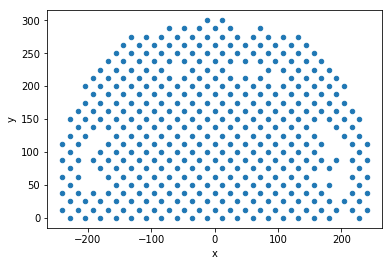

In [144]:
meta_grid.loc[keep_grid].plot(kind='scatter', x='x', y='y')

In [145]:
top_cluster = [ '-228.000000456_125.0', '-228.000000456_150.0', '-204.000000408_0.0', '-204.000000408_25.0', '-180.00000036_0.0', '-180.00000036_25.0', '-180.00000036_75.0', '-180.00000036_100.0', '-156.00000031200003_0.0', '-156.00000031200003_25.0', '-156.00000031200003_50.0', '-156.00000031200003_75.0', '-156.00000031200003_125.0', '-156.00000031200003_150.0', '-156.00000031200003_175.0', '-132.00000026400002_0.0', '-132.00000026400002_25.0', '-132.00000026400002_50.0', '-132.00000026400002_75.0', '-132.00000026400002_100.0', '-132.00000026400002_125.0', '-132.00000026400002_150.0', '-132.00000026400002_175.0', '-132.00000026400002_200.0', '-108.00000021600002_0.0', '-108.00000021600002_25.0', '-108.00000021600002_50.0', '-108.00000021600002_75.0', '-108.00000021600002_100.0', '-108.00000021600002_125.0', '-108.00000021600002_150.0', '-108.00000021600002_175.0', '-84.00000016800001_0.0', '-84.00000016800001_25.0', '-84.00000016800001_50.0', '-84.00000016800001_75.0', '-84.00000016800001_100.0', '-84.00000016800001_125.0', '-84.00000016800001_150.0', '-84.00000016800001_175.0', '-84.00000016800001_200.0', '-60.00000012000001_0.0', '-60.00000012000001_100.0', '-60.00000012000001_125.0', '-60.00000012000001_150.0', '-60.00000012000001_175.0', '-60.00000012000001_200.0', '-36.000000072000034_100.0', '-36.000000072000034_125.0', '-36.000000072000034_150.0', '-36.000000072000034_175.0', '-36.000000072000034_200.0', '-36.000000072000034_225.0', '-12.00000002400003_125.0', '-12.00000002400003_150.0', '-12.00000002400003_175.0', '-12.00000002400003_200.0', '-12.00000002400003_225.0', '12.000000023999974_125.0', '12.000000023999974_150.0', '12.000000023999974_175.0', '12.000000023999974_200.0', '12.000000023999974_225.0', '12.000000023999974_300.0', '36.00000007199998_125.0', '36.00000007199998_150.0', '36.00000007199998_175.0', '36.00000007199998_200.0', '60.00000011999998_0.0', '60.00000011999998_50.0', '60.00000011999998_100.0', '60.00000011999998_125.0', '60.00000011999998_150.0', '60.00000011999998_175.0', '60.00000011999998_200.0', '84.00000016799999_0.0', '84.00000016799999_25.0', '84.00000016799999_75.0', '84.00000016799999_125.0', '84.00000016799999_150.0', '84.00000016799999_175.0', '84.00000016799999_200.0', '108.00000021599999_25.0', '108.00000021599999_50.0', '108.00000021599999_75.0', '108.00000021599999_125.0', '108.00000021599999_150.0', '108.00000021599999_175.0', '108.00000021599999_200.0', '132.000000264_0.0', '132.000000264_25.0', '132.000000264_50.0', '132.000000264_75.0', '132.000000264_100.0', '132.000000264_125.0', '132.000000264_150.0', '132.000000264_175.0', '156.000000312_0.0', '156.000000312_25.0', '156.000000312_50.0', '156.000000312_75.0', '156.000000312_100.0', '156.000000312_125.0', '156.000000312_150.0', '180.00000036_0.0', '180.00000036_25.0', '180.00000036_50.0', '180.00000036_75.0', '204.000000408_25.0', '204.000000408_175.0', '-216.00000043200004_87.5', '-192.00000038400003_12.5', '-192.00000038400003_37.5', '-192.00000038400003_87.5', '-168.00000033600003_12.5', '-168.00000033600003_37.5', '-168.00000033600003_62.5', '-168.00000033600003_87.5', '-168.00000033600003_137.5', '-168.00000033600003_237.5', '-144.00000028800002_12.5', '-144.00000028800002_37.5', '-144.00000028800002_62.5', '-144.00000028800002_87.5', '-144.00000028800002_112.5', '-144.00000028800002_137.5', '-144.00000028800002_162.5', '-120.00000024000002_12.5', '-120.00000024000002_37.5', '-120.00000024000002_62.5', '-120.00000024000002_87.5', '-120.00000024000002_112.5', '-120.00000024000002_137.5', '-120.00000024000002_162.5', '-120.00000024000002_187.5', '-120.00000024000002_212.5', '-96.00000019200002_12.5', '-96.00000019200002_37.5', '-96.00000019200002_62.5', '-96.00000019200002_87.5', '-96.00000019200002_112.5', '-96.00000019200002_137.5', '-96.00000019200002_162.5', '-96.00000019200002_187.5', '-72.00000014400001_62.5', '-72.00000014400001_87.5', '-72.00000014400001_112.5', '-72.00000014400001_137.5', '-72.00000014400001_162.5', '-72.00000014400001_187.5', '-48.00000009600001_112.5', '-48.00000009600001_137.5', '-48.00000009600001_162.5', '-48.00000009600001_187.5', '-48.00000009600001_212.5', '-24.000000048000004_137.5', '-24.000000048000004_162.5', '-24.000000048000004_187.5', '-24.000000048000004_212.5', '-24.000000048000004_237.5', '0.0_137.5', '0.0_162.5', '0.0_187.5', '0.0_212.5', '24.000000048000004_112.5', '24.000000048000004_137.5', '24.000000048000004_162.5', '24.000000048000004_187.5', '24.000000048000004_212.5', '48.00000009600001_112.5', '48.00000009600001_137.5', '48.00000009600001_162.5', '48.00000009600001_187.5', '48.00000009600001_212.5', '72.00000014400001_12.5', '72.00000014400001_37.5', '72.00000014400001_62.5', '72.00000014400001_87.5', '72.00000014400001_112.5', '72.00000014400001_137.5', '72.00000014400001_162.5', '72.00000014400001_187.5', '72.00000014400001_212.5', '96.00000019199996_37.5', '96.00000019199996_62.5', '96.00000019199996_87.5', '96.00000019199996_112.5', '96.00000019199996_137.5', '96.00000019199996_162.5', '96.00000019199996_187.5', '120.00000023999996_12.5', '120.00000023999996_37.5', '120.00000023999996_62.5', '120.00000023999996_87.5', '120.00000023999996_112.5', '120.00000023999996_137.5', '120.00000023999996_162.5', '120.00000023999996_187.5', '144.00000028799997_12.5', '144.00000028799997_37.5', '144.00000028799997_62.5', '144.00000028799997_87.5', '144.00000028799997_112.5', '144.00000028799997_137.5', '144.00000028799997_162.5', '168.00000033599997_12.5', '168.00000033599997_37.5', '168.00000033599997_87.5', '168.00000033599997_112.5', '168.00000033599997_162.5', '192.00000038399997_12.5', '192.00000038399997_87.5', '192.00000038399997_137.5', '216.00000043199998_87.5']
middle_cluster = [ '-228.000000456_0.0', '-228.000000456_25.0', '-228.000000456_50.0', '-228.000000456_75.0', '-228.000000456_100.0', '-204.000000408_125.0', '-204.000000408_150.0', '-204.000000408_175.0', '-204.000000408_200.0', '-180.00000036_150.0', '-180.00000036_175.0', '-180.00000036_200.0', '-180.00000036_225.0', '-156.00000031200003_100.0', '-156.00000031200003_200.0', '-156.00000031200003_225.0', '-156.00000031200003_250.0', '-132.00000026400002_225.0', '-132.00000026400002_250.0', '-132.00000026400002_275.0', '-108.00000021600002_200.0', '-108.00000021600002_225.0', '-108.00000021600002_250.0', '-108.00000021600002_275.0', '-84.00000016800001_225.0', '-84.00000016800001_250.0', '-84.00000016800001_275.0', '-60.00000012000001_250.0', '-60.00000012000001_275.0', '-36.000000072000034_250.0', '-36.000000072000034_275.0', '-12.00000002400003_250.0', '-12.00000002400003_275.0', '-12.00000002400003_300.0', '12.000000023999974_250.0', '12.000000023999974_275.0', '36.00000007199998_250.0', '36.00000007199998_275.0', '60.00000011999998_250.0', '60.00000011999998_275.0', '84.00000016799999_225.0', '84.00000016799999_250.0', '84.00000016799999_275.0', '108.00000021599999_0.0', '108.00000021599999_100.0', '108.00000021599999_225.0', '108.00000021599999_250.0', '108.00000021599999_275.0', '132.000000264_200.0', '132.000000264_225.0', '132.000000264_250.0', '132.000000264_275.0', '156.000000312_175.0', '156.000000312_200.0', '156.000000312_225.0', '156.000000312_250.0', '180.00000036_150.0', '180.00000036_175.0', '180.00000036_200.0', '180.00000036_225.0', '204.000000408_125.0', '204.000000408_150.0', '204.000000408_200.0', '228.00000045599995_0.0', '228.00000045599995_25.0', '228.00000045599995_50.0', '228.00000045599995_75.0', '228.00000045599995_100.0', '228.00000045599995_125.0', '228.00000045599995_150.0', '-240.00000048_12.5', '-240.00000048_37.5', '-240.00000048_62.5', '-240.00000048_87.5', '-240.00000048_112.5', '-216.00000043200004_12.5', '-216.00000043200004_37.5', '-216.00000043200004_62.5', '-216.00000043200004_112.5', '-216.00000043200004_137.5', '-216.00000043200004_162.5', '-192.00000038400003_137.5', '-192.00000038400003_162.5', '-192.00000038400003_187.5', '-192.00000038400003_212.5', '-168.00000033600003_112.5', '-168.00000033600003_162.5', '-168.00000033600003_187.5', '-168.00000033600003_212.5', '-144.00000028800002_187.5', '-144.00000028800002_212.5', '-144.00000028800002_237.5', '-144.00000028800002_262.5', '-120.00000024000002_237.5', '-120.00000024000002_262.5', '-96.00000019200002_212.5', '-96.00000019200002_237.5', '-96.00000019200002_262.5', '-72.00000014400001_212.5', '-72.00000014400001_237.5', '-72.00000014400001_262.5', '-72.00000014400001_287.5', '-48.00000009600001_237.5', '-48.00000009600001_262.5', '-48.00000009600001_287.5', '-24.000000048000004_262.5', '-24.000000048000004_287.5', '0.0_237.5', '0.0_262.5', '0.0_287.5', '24.000000048000004_237.5', '24.000000048000004_262.5', '24.000000048000004_287.5', '48.00000009600001_237.5', '48.00000009600001_262.5', '72.00000014400001_237.5', '72.00000014400001_262.5', '72.00000014400001_287.5', '96.00000019199996_237.5', '96.00000019199996_262.5', '120.00000023999996_212.5', '120.00000023999996_237.5', '120.00000023999996_262.5', '144.00000028799997_187.5', '144.00000028799997_212.5', '144.00000028799997_237.5', '144.00000028799997_262.5', '168.00000033599997_187.5', '168.00000033599997_212.5', '168.00000033599997_237.5', '192.00000038399997_162.5', '192.00000038399997_187.5', '192.00000038399997_212.5', '216.00000043199998_12.5', '216.00000043199998_37.5', '216.00000043199998_62.5', '216.00000043199998_112.5', '216.00000043199998_137.5', '216.00000043199998_162.5', '240.00000048000004_12.5', '240.00000048000004_37.5', '240.00000048000004_62.5', '240.00000048000004_87.5', '240.00000048000004_112.5']
bottom_cluster = [ '-60.00000012000001_25.0', '-60.00000012000001_50.0', '-60.00000012000001_75.0', '-36.000000072000034_0.0', '-36.000000072000034_25.0', '-36.000000072000034_50.0', '-36.000000072000034_75.0', '-12.00000002400003_0.0', '-12.00000002400003_25.0', '-12.00000002400003_50.0', '-12.00000002400003_75.0', '-12.00000002400003_100.0', '12.000000023999974_0.0', '12.000000023999974_25.0', '12.000000023999974_50.0', '12.000000023999974_75.0', '12.000000023999974_100.0', '36.00000007199998_0.0', '36.00000007199998_25.0', '36.00000007199998_50.0', '36.00000007199998_75.0', '36.00000007199998_100.0', '60.00000011999998_25.0', '60.00000011999998_75.0', '84.00000016799999_50.0', '84.00000016799999_100.0', '-72.00000014400001_12.5', '-72.00000014400001_37.5', '-48.00000009600001_12.5', '-48.00000009600001_37.5', '-48.00000009600001_62.5', '-48.00000009600001_87.5', '-24.000000048000004_12.5', '-24.000000048000004_37.5', '-24.000000048000004_62.5', '-24.000000048000004_87.5', '-24.000000048000004_112.5', '0.0_12.5', '0.0_37.5', '0.0_62.5', '0.0_87.5', '0.0_112.5', '24.000000048000004_12.5', '24.000000048000004_37.5', '24.000000048000004_62.5', '24.000000048000004_87.5', '48.00000009600001_12.5', '48.00000009600001_37.5', '48.00000009600001_62.5', '48.00000009600001_87.5', '96.00000019199996_12.5']

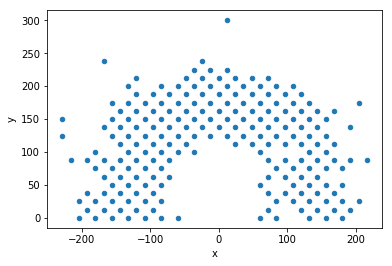

In [146]:
meta_grid.loc[top_cluster].plot(kind='scatter', x='x', y='y')

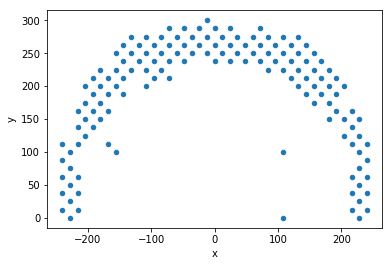

In [147]:
meta_grid.loc[middle_cluster].plot(kind='scatter', x='x', y='y')

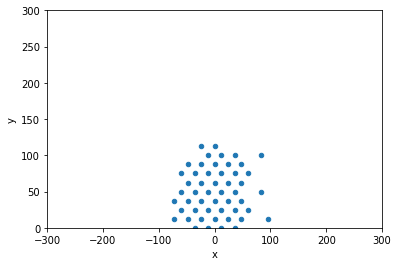

In [148]:
meta_grid.loc[bottom_cluster].plot(kind='scatter', x='x', y='y', xlim=(-300, 300), ylim=(0, 300))

In [164]:
from scipy.spatial import distance

In [168]:
d = distance.euclidean((0,0), (3, 4))
d

5.0

In [184]:
meta_grid['Distance'] = meta_grid.apply(lambda x: distance.euclidean((0,0), (x['x'], x['y'])), axis=1)/300

In [185]:
meta_grid

,x,y,Region,distance,Distance
-228.000000456_125.0,-228.0,125.0,midrange,260.017308,0.866724
-228.000000456_150.0,-228.0,150.0,midrange,272.917570,0.909725
-204.000000408_0.0,-204.0,0.0,midrange,204.000000,0.680000
-204.000000408_25.0,-204.0,25.0,midrange,205.526154,0.685087
-180.00000036_0.0,-180.0,0.0,midrange,180.000000,0.600000
...,...,...,...,...,...
48.00000009600001_12.5,48.0,12.5,paint,49.600907,0.165336
48.00000009600001_37.5,48.0,37.5,paint,60.911822,0.203039
48.00000009600001_62.5,48.0,62.5,paint,78.805139,0.262684
48.00000009600001_87.5,48.0,87.5,paint,99.801052,0.332670


In [186]:
meta_grid['distance'].max()

305.03934183920603

In [187]:
meta_grid.loc[top_cluster, 'Region'] = 'midrange'
meta_grid.loc[middle_cluster, 'Region'] = 'downtown'
meta_grid.loc[bottom_cluster, 'Region'] = 'paint'

In [188]:
meta_grid = meta_grid.loc[top_cluster + middle_cluster + bottom_cluster]
meta_grid

,x,y,Region,distance,Distance
-228.000000456_125.0,-228.0,125.0,midrange,260.017308,0.866724
-228.000000456_150.0,-228.0,150.0,midrange,272.917570,0.909725
-204.000000408_0.0,-204.0,0.0,midrange,204.000000,0.680000
-204.000000408_25.0,-204.0,25.0,midrange,205.526154,0.685087
-180.00000036_0.0,-180.0,0.0,midrange,180.000000,0.600000
...,...,...,...,...,...
48.00000009600001_12.5,48.0,12.5,paint,49.600907,0.165336
48.00000009600001_37.5,48.0,37.5,paint,60.911822,0.203039
48.00000009600001_62.5,48.0,62.5,paint,78.805139,0.262684
48.00000009600001_87.5,48.0,87.5,paint,99.801052,0.332670


In [189]:
meta_grid

,x,y,Region,distance,Distance
-228.000000456_125.0,-228.0,125.0,midrange,260.017308,0.866724
-228.000000456_150.0,-228.0,150.0,midrange,272.917570,0.909725
-204.000000408_0.0,-204.0,0.0,midrange,204.000000,0.680000
-204.000000408_25.0,-204.0,25.0,midrange,205.526154,0.685087
-180.00000036_0.0,-180.0,0.0,midrange,180.000000,0.600000
...,...,...,...,...,...
48.00000009600001_12.5,48.0,12.5,paint,49.600907,0.165336
48.00000009600001_37.5,48.0,37.5,paint,60.911822,0.203039
48.00000009600001_62.5,48.0,62.5,paint,78.805139,0.262684
48.00000009600001_87.5,48.0,87.5,paint,99.801052,0.332670


In [190]:
net.load_df(df_grid_final, meta_col=meta_player, meta_row=meta_grid, row_cats=['Region', 'Distance'])
net.set_manual_category(col='Category', preferred_cats=df_colors)
net.set_global_cat_colors(df_colors)
net.normalize(norm_type='umi', axis='col')
net.normalize(norm_type='zscore', axis='row', z_clip=5)
net.widget()

CGM2(manual_cat='{"col": {"col_cat_colors": {"num shots: 1006.0": "#393b79", "num shots: 1022.0": "#ff7f0e", "…

In [191]:
meta_player.to_csv('../data/meta_player.csv')

In [192]:
net.save_dict_to_json(net.viz, '../data/shot_chart_heatmap.json')

In [193]:
df_grid_final

,Steven_Adams,Bam_Adebayo,LaMarcus_Aldridge,Jarrett_Allen,Kadeem_Allen,Kyle_Anderson,Giannis_Antetokounmpo,OG_Anunoby,Ryan_Arcidiacono,D.J._Augustin,...,Andrew_Wiggins,Kenrich_Williams,Lou_Williams,Marvin_Williams,D.J._Wilson,Justise_Winslow,Trae_Young,Cody_Zeller,Ante_Zizic,Ivica_Zubac
-228.000000456_0.0,0.0,1.0,0.0,6.0,0.0,6.0,2.0,18.0,6.0,13.0,...,6.0,6.0,4.0,16.0,1.0,8.0,1.0,0.0,0.0,0.0
-228.000000456_25.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,4.0,5.0,5.0,...,9.0,0.0,2.0,9.0,4.0,11.0,1.0,0.0,0.0,0.0
-228.000000456_50.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,...,5.0,1.0,3.0,7.0,0.0,6.0,2.0,0.0,0.0,0.0
-228.000000456_75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,4.0,1.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0
-228.000000456_100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240.00000048000004_12.5,0.0,0.0,1.0,3.0,0.0,2.0,1.0,5.0,5.0,3.0,...,4.0,2.0,1.0,5.0,3.0,7.0,3.0,0.0,0.0,0.0
240.00000048000004_37.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,2.0,0.0,2.0,7.0,3.0,2.0,2.0,0.0,0.0,0.0
240.00000048000004_62.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0
240.00000048000004_87.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [162]:
meta_grid.to_csv('../data/meta_grid.csv')